# Global Power Plant Database Project

Problem Statement:
    
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database

The database includes the following indicators:
    

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013


`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


Importing Data Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('global_Power_plant_database.csv')

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(908, 25)

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Observations:
    
    1.There are 12 object and 13 numerical columns in data

Remove some columns those having maximum number of null values

In [9]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

Removing unwanted columns

In [11]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [12]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [13]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [14]:
df['year_of_capacity_data'].nunique()

1

Removing column "year of capacity_data" because it having one unique value

In [15]:
df['name'].nunique()

908

Dropping name column

In [17]:
df.drop(['name','url'],axis=1,inplace=True)

In [18]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [19]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [20]:
# removing 'year_of_capacity_data' column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [21]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [22]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

Observations:
    
    1.Null values has been removed.

In [23]:
df['source'].nunique()

191

In [24]:
df['geolocation_source'].nunique()

3

In [25]:
df['country'].nunique()

1

Dropping columns'country' and 'country_long' because having one country name only,it will not help for any prediction

In [26]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

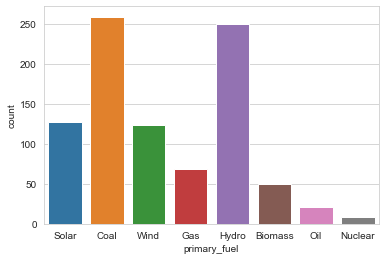

In [28]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

Exploratory Data Analysis

In [29]:
import matplotlib.pyplot as plt

In [30]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,60.000000,60.000000,60.000,60.000000,60.000000
1,98.0,24.7663,74.6090,Coal,60.0,Ultratech Cement ltd,WRI,60.000000,60.000000,60.000,60.000000,60.000000
2,39.2,21.9038,69.3732,Wind,60.0,CDM,WRI,60.000000,60.000000,60.000,60.000000,60.000000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [31]:
dfcorr=df.corr()

<AxesSubplot:>

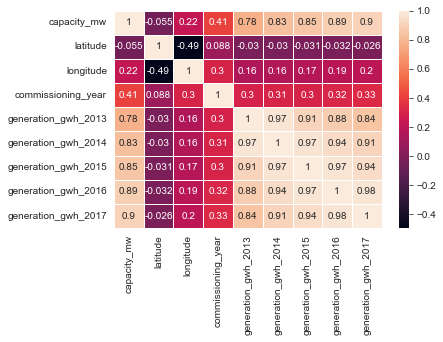

In [32]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

Observations:
    
    1.Here we can notice generation_gwh_2013,...2014,....2015,...2016 ,...2017 are positively correlated to capacity_mw and latitude is negative correlated

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

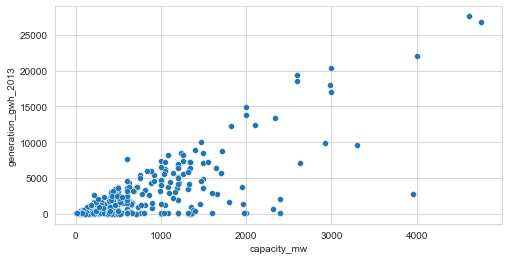

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

Observations:
    
    1.we can notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2013

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

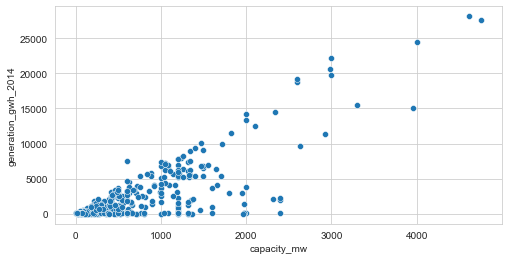

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

Observations:
    
    1.In 2014 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2014

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

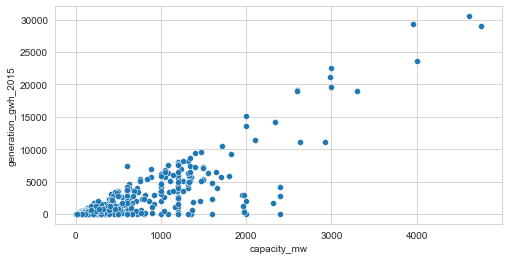

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

Observations:
    
    1.In 2015 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2015

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

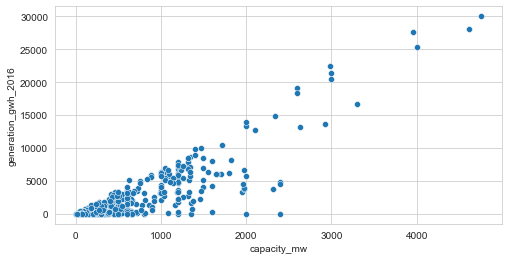

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

Observations:
    
    1.In 2016 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2016

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

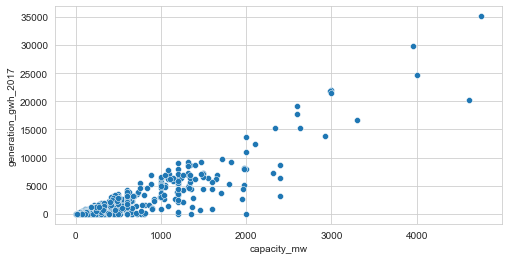

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

Observations:
    
    1.In 2017 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2017

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

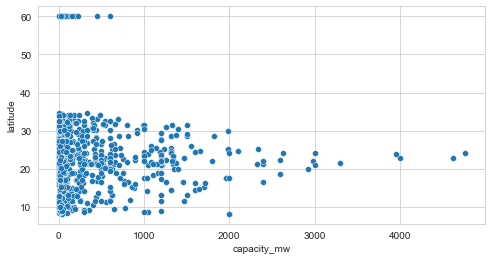

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

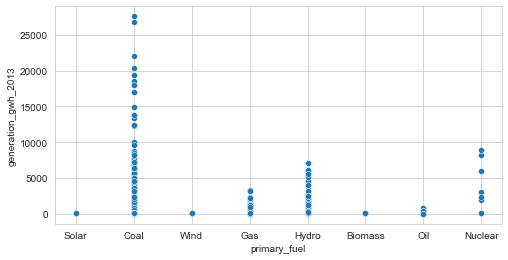

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

Observations:
    
    1.we can here the coal is most used fuel in 2013 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

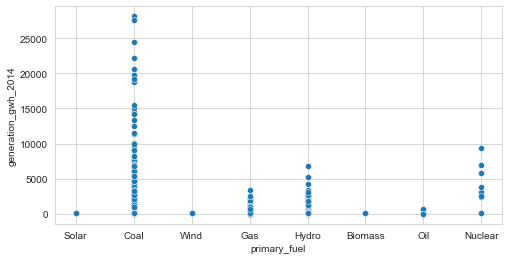

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

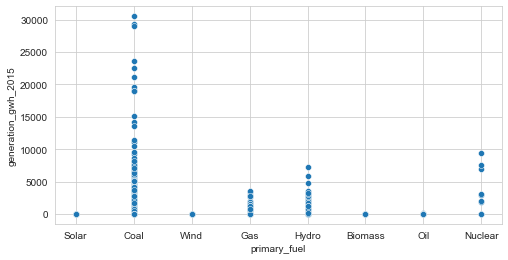

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

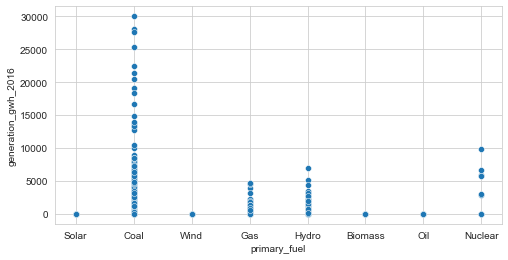

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

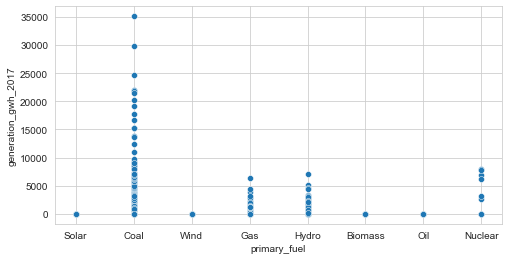

In [43]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

Observations:
    
    1.In all of the year 2013 to 2017 the coal is most used fuel in 2013 and Nuclear,Gas and hydro on average use and Solar,Wind Biomass and oil was very less used.

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

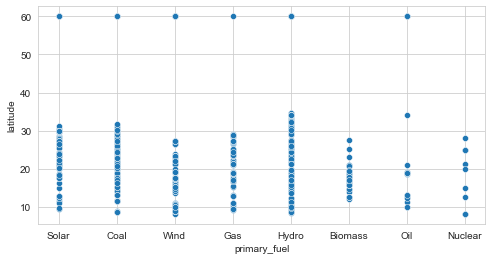

In [44]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

Observations:
    
    1.Coal is on max electrical generating capacity in megawatts

Using LabelEncoder for convering categorical to numerical

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [48]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [49]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [50]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int32  
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    int32  
 6   geolocation_source   908 non-null    int32  
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.6 KB


Removal of Outliers 

zscore Method

In [52]:
from scipy.stats import zscore

z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 210,
       210, 210, 210, 210, 210, 309, 309, 309, 309, 309, 309, 364, 365,
       365, 365, 365, 365, 365, 376, 483, 494, 494, 494, 494, 494, 494,
       495, 495, 495, 495, 495, 495, 533, 533, 624, 649, 649, 649, 649,
       649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696, 696,
       722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727,
       727, 727, 727, 787, 787, 787, 787, 787, 787, 789, 809, 809, 809,
       809, 809, 809, 881, 881, 881, 881, 881, 881], dtype=int64), array([2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [53]:
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (908, 12)
Shape of the dataframe after removing outliers:  (885, 12)
Percentage of data loss post outlier removal:  2.5330396475770924


In [54]:
df.shape

(885, 12)

Skewness Handling

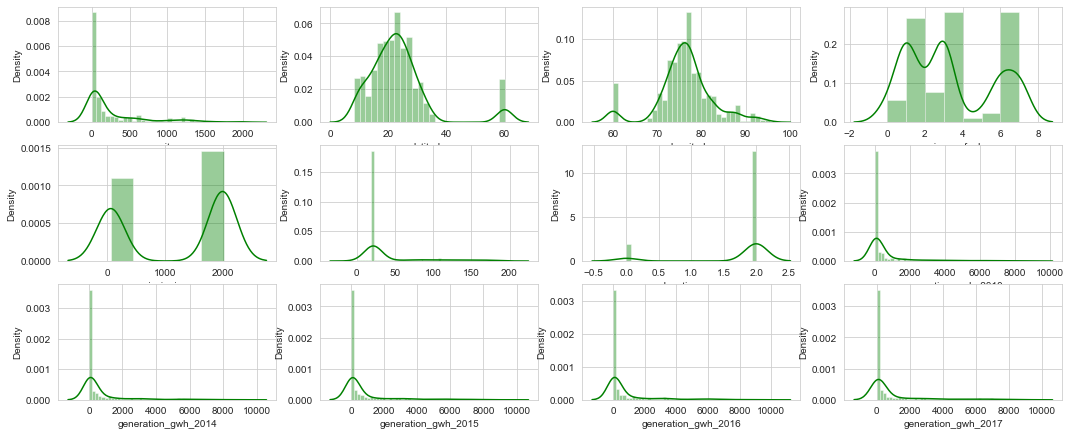

In [56]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [57]:
df.skew()

capacity_mw            2.052718
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    2.994575
generation_gwh_2014    2.867788
generation_gwh_2015    2.684811
generation_gwh_2016    2.630710
generation_gwh_2017    2.540274
dtype: float64

Observations:
    
    1.Skewness more than+/- 0.5 has to be treated.

In [58]:
from sklearn.preprocessing import power_transform

df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

In [59]:
df.skew()

capacity_mw            0.014952
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013   -0.034887
generation_gwh_2014   -0.014669
generation_gwh_2015   -0.012333
generation_gwh_2016   -0.009262
generation_gwh_2017   -0.005003
dtype: float64

In [60]:
pd.DataFrame(df).isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

'capacity_mw' as target for creating Regression model

Dividing data into x and y

In [61]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [62]:
x.shape

(885, 11)

In [63]:
y.shape

(885,)

Scaling x Values

In [65]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [66]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [67]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.290048,0.464901,0.466182,0.564383,0.233637,0.863277,0.591291,0.568494,0.568932,0.566561,0.565028
std,0.204202,0.173085,0.326078,0.489898,0.237158,0.342100,0.183883,0.196731,0.200379,0.202994,0.210328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169119,0.388333,0.142857,0.000000,0.115789,1.000000,0.504674,0.478042,0.477061,0.470282,0.465067
50%,0.269591,0.463212,0.428571,0.978039,0.115789,1.000000,0.504674,0.478042,0.477061,0.470282,0.465067
75%,0.359508,0.539802,0.857143,0.991828,0.184211,1.000000,0.710270,0.700391,0.703337,0.699987,0.703190
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations:
    
    1.Data have been scalled.

Model Building

Linear Regression

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Splitting the Data

In [69]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.6033793987661354
At random state 0, The test accuracy is: 0.6216727027615341


At random state 1, The training accuracy is: 0.6083279878933308
At random state 1, The test accuracy is: 0.6022223138115208


At random state 2, The training accuracy is: 0.6353782409904477
At random state 2, The test accuracy is: 0.4688289866613957


At random state 3, The training accuracy is: 0.6102288217663278
At random state 3, The test accuracy is: 0.5919635215348062


At random state 4, The training accuracy is: 0.608802736407805
At random state 4, The test accuracy is: 0.5962173327956521


At random state 5, The training accuracy is: 0.620339909413044
At random state 5, The test accuracy is: 0.5423848089457906


At random state 6, The training accuracy is: 0.6179931752699392
At random state 6, The test accuracy is: 0.5442706774717503


At random state 7, The training accuracy is: 0.6162228512356386
At random state 7, The test accuracy is: 0.5570579582338

Observations:
    
    1.Random state=95 giving highest accuracy, choosing that as random state

Splitting the Data with Random State = 95

In [70]:
#splitting the data into 73% training and 27% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [71]:
x_train.shape

(646, 11)

In [72]:
x_test.shape

(239, 11)

In [73]:
y_train.shape

(646,)

In [74]:
y_test.shape

(239,)

In [75]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.5864596104267872


In [76]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.3678555845581379
MAE: 0.4830078050551141
r2_score: 0.3663834258020635


In [77]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.5863280068229355


In [78]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.3674881298516646
MAE: 0.48409629349125477
r2_score: 0.3588186337202316


SVR(kernel = 'Linear')

In [79]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.5456748672496702


In [80]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.3883396187655998
MAE: 0.44202498117068884
r2_score: 0.4679625216734927


SVR(kernel='Poly')

In [81]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.7829703605553091


In [82]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 0.2134273177685649
MAE: 0.3334210320564536
r2_score: 0.7483369252858192


In [83]:
(kernel='rbf')

SyntaxError: invalid syntax (Temp/ipykernel_22524/1123815670.py, line 1)

In [84]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.7823377630968558


In [85]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.1891729158220723
MAE: 0.3238741545948087
r2_score: 0.7479458546128988


In [86]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9586605450053771


In [87]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.14453693558935118
MAE: 0.27832506239105126
r2_score: 0.8225009516013011


In [88]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9906753612727366


In [89]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.2975010565480804
MAE: 0.3948850510886349
r2_score: 0.6892866479226858


In [90]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8802104166754463


In [91]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.15011399114955765
MAE: 0.29748036116853416
r2_score: 0.8111132896340407


Cross Validation

In [92]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.405445, 0.062499
R    : 0.404019, 0.062006
svr    : 0.446500, 0.076536
svr_p    : 0.249986, 0.053431
svr_r    : 0.231048, 0.063926
RF    : 0.211109, 0.060104
DTR    : 0.325838, 0.097565
GBR    : 0.204018, 0.063639


Observations:
    
    1.According to all metrics score selecting the GradientBoostingRegressoras for GridSeachCV

Hyper Parameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV

In [96]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [97]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [98]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [99]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [100]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.14975399518721538
MAE: 0.2827110592241609
r2_score: 0.8179831151166288


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

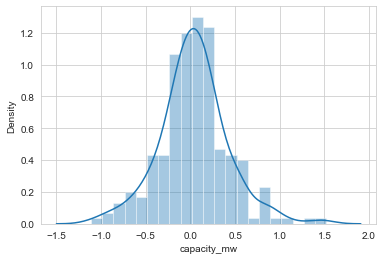

In [101]:
sns.distplot(GF_grid_pred-y_test)

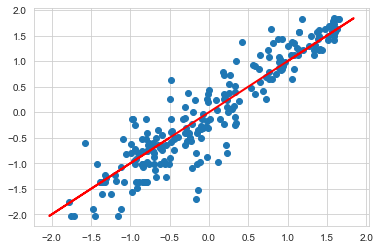

In [102]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

Observations:
    
    1.Choosing GradientBoostingRegressor as the best model

Saving the Model

In [103]:
import joblib

In [104]:
joblib.dump(GF_grid.best_estimator_,'Global Power Plant Database Regression.obj')

['Global Power Plant Database Regression.obj']

Taking 'primary_fuel' as target, creating Classification Model

Dividing data into x and y

In [105]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [106]:
x.shape

(885, 11)

In [107]:
y.shape

(885,)

Spliting Train and Test data

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [111]:
x_train.shape

(646, 11)

In [112]:
x_test.shape

(239, 11)

In [113]:
y_train.shape

(646,)

In [114]:
y_test.shape

(239,)

Model Building

In [115]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [116]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.5378531073446328


In [117]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.5564853556485355
[[ 0  1  0  0  0  0 10  1]
 [ 0  8  0 39  0  0 17  4]
 [ 0  2  0 14  0  0  2  1]
 [ 0  3  0 65  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  2  0  0  3  0]
 [ 0  2  0  0  0  0 25  3]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.12      0.19        68
           2       0.00      0.00      0.00        19
           3       0.53      0.96      0.68        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.44      0.83      0.57        30
           7       0.80      1.00      0.89        35

    accuracy                           0.56       239
   macro avg       0.28      0.36      0.29       239
weighted avg       0.47      0.56      0.45       239

Training accuracy:: 0.5340557275541795
Test accuracy:: 0.5564853556485355


In [118]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7875706214689264


In [119]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.803347280334728
[[11  1  0  0  0  0  0  0]
 [ 1 50  8  5  1  3  0  0]
 [ 0  3  8  7  0  1  0  0]
 [ 0  8  3 57  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 1  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.78      0.74      0.76        68
           2       0.38      0.42      0.40        19
           3       0.83      0.84      0.83        68
           4       0.00      0.00      0.00         2
           5       0.29      0.40      0.33         5
           6       1.00      0.97      0.98        30
           7       1.00      1.00      1.00        35

    accuracy                           0.80       239
   macro avg       0.64      0.66      0.65       239
weighted avg       0.81      0.80      0.81       239

Training accuracy:: 1.0
Test accuracy:: 0.803347280334728


In [120]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7299435028248588


In [121]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7364016736401674
[[ 8  2  1  0  0  0  1  0]
 [ 2 43  5 12  0  0  5  1]
 [ 1  8  5  4  0  0  0  1]
 [ 0  1  1 64  0  2  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 1  1  0  2  0  0  1  0]
 [ 5  3  0  0  0  0 21  1]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.47      0.67      0.55        12
           1       0.74      0.63      0.68        68
           2       0.38      0.26      0.31        19
           3       0.77      0.94      0.85        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.75      0.70      0.72        30
           7       0.92      1.00      0.96        35

    accuracy                           0.74       239
   macro avg       0.50      0.53      0.51       239
weighted avg       0.71      0.74      0.72       239

Training accuracy:: 0.8142414860681114
Test accuracy:: 0.7364016736401674


In [122]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8474576271186441


In [123]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8493723849372385
[[11  1  0  0  0  0  0  0]
 [ 6 53  0  7  0  2  0  0]
 [ 0  5  6  6  0  2  0  0]
 [ 0  3  0 65  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.83      0.78      0.80        68
           2       0.86      0.32      0.46        19
           3       0.83      0.96      0.89        68
           4       0.00      0.00      0.00         2
           5       0.38      0.60      0.46         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.85       239
   macro avg       0.69      0.70      0.67       239
weighted avg       0.85      0.85      0.84       239

Training accuracy:: 1.0
Test accuracy:: 0.8493723849372385


In [124]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.5458503575076609


In [125]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.41841004184100417
[[ 0  0  0 12  0  0  0  0]
 [ 0  3  0 65  0  0  0  0]
 [ 0  0  0 19  0  0  0  0]
 [ 0  0  0 68  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0  1  0  0 29  0]
 [ 0 35  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.08      0.04      0.06        68
           2       0.00      0.00      0.00        19
           3       0.40      1.00      0.57        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.98        30
           7       0.00      0.00      0.00        35

    accuracy                           0.42       239
   macro avg       0.18      0.25      0.20       239
weighted avg       0.26      0.42      0.30       239

Training accuracy:: 0.44272445820433437
Test accuracy:: 0.41841004184100417


In [126]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8338483146067415


In [127]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8200836820083682
[[11  1  0  0  0  0  0  0]
 [ 6 49  5  7  0  1  0  0]
 [ 0  2  6  9  0  2  0  0]
 [ 0  5  0 63  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  1  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.82      0.72      0.77        68
           2       0.50      0.32      0.39        19
           3       0.80      0.93      0.86        68
           4       0.00      0.00      0.00         2
           5       0.43      0.60      0.50         5
           6       1.00      0.97      0.98        30
           7       1.00      1.00      1.00        35

    accuracy                           0.82       239
   macro avg       0.65      0.68      0.66       239
weighted avg       0.81      0.82      0.81       239

Training accuracy:: 0.9938080495356038
Test accuracy:: 0.8200836820083682


In [128]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8530643513789581


In [129]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8368200836820083
[[12  0  0  0  0  0  0  0]
 [ 5 51  2  7  2  1  0  0]
 [ 0  5  9  3  0  2  0  0]
 [ 0  5  1 62  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  3  0  0  1  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.81      0.75      0.78        68
           2       0.60      0.47      0.53        19
           3       0.86      0.91      0.89        68
           4       0.00      0.00      0.00         2
           5       0.20      0.20      0.20         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.84       239
   macro avg       0.65      0.67      0.65       239
weighted avg       0.83      0.84      0.83       239

Training accuracy:: 1.0
Test accuracy:: 0.8368200836820083


RandomForestClassifier as final model for HYPER PARAMETER TUNING

Hyper Parameter Tuning

In [130]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [131]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [132]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8284518828451883


In [133]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

Model Training with best Parameters

In [134]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [135]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [136]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8284518828451883


Report of RandomForestClassifier

In [138]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.84      0.75      0.79        68
           2       0.80      0.21      0.33        19
           3       0.78      0.96      0.86        68
           4       0.00      0.00      0.00         2
           5       0.29      0.40      0.33         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.83       239
   macro avg       0.66      0.65      0.63       239
weighted avg       0.83      0.83      0.81       239



<AxesSubplot:>

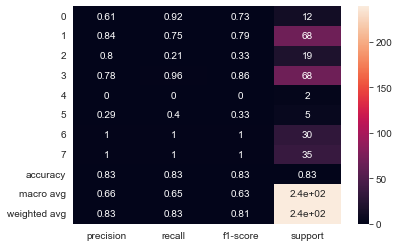

In [139]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [140]:
from sklearn.metrics import roc_auc_score

In [141]:
y_prob = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.936745 (macro),
0.950466 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.951641 (macro),
0.971094 (weighted by prevalence)


Saving Model

In [142]:
import joblib

In [143]:
joblib.dump(best_rfc_grid.best_estimator_,'Global Power Plant Classification.obj')

['Global Power Plant Classification.obj']